In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

XGBoost is a random forest that "grows" new trees (estimators) progressively

In [15]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.integrate import odeint, solve_ivp
from scipy.fft import fft


import matplotlib.pylab as plt
import seaborn as sns
import mpl_interactions.ipyplot as iplt
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import Sequence
from tensorflow import keras

import shap as shap
try:
    import lime
    import lime.lime_tabular    
except ImportError:
    pass

%matplotlib inline


import matplotlib
import matplotlib.pyplot as plt

# for reproducibility of this notebook:
rng = np.random.RandomState(42)
#tf.random.set_seed(42)
np.random.seed(42)




In [16]:
# Configurations

Settings=["Base", "Random", "Energy","Gamma"]
Model_types=["True", "Complex", "Simple"]
Param_array = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.0, 'delta' : 0.3, 'omega' : 0.0},
          {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]

In [17]:
i = 0
j = 1
k = 8

feature_setting = Settings[i]
model_setting = Model_types[j]
params = Param_array[k]

In [18]:
modelXGB = xgb.XGBRegressor(
    n_estimators = 5000,  # Maximum number of trees (like epochs for neural networks)
    max_depth = 3,  # Maximum tree depth
    eta = 0.01,  # Learning rate per tree
    subsample = 0.8,  # Sub-sample of the training set to use for each tree. Recommended [0.7, 1.0]
    )

In [19]:
def compile_and_fit_XGBoost(modelXGB, Xdata, Ydata, validation_split = 0.2,
                            early_stopping_rounds = 10, verbose = True):
    '''
    validation_split: percentage of training data to use for validation and monitor early stopping
    early_stopping_rounds: Minimum number of trees. After that, stop growing the forest if there is no improvement
    '''
    xtrain, xval, ytrain, yval = train_test_split(Xdata, Ydata, 
                                                  test_size = validation_split, random_state = None)
    evalset = [(xtrain, ytrain), (xval, yval)]
    
    modelXGB.fit(xtrain, ytrain, early_stopping_rounds = early_stopping_rounds, 
                 eval_metric='rmse', eval_set=evalset, verbose = verbose)

In [21]:
from Code.BaseDuffing import Duffing

In [28]:
# load dataset

duffing = Duffing(parameters = params)
eom = duffing.eom


features = duffing.features
labels = duffing.labels

# generate some data to train the scaler

end_time = 100
duffing.generate(10000, samples = 50, end_time = end_time)
duffing.scale_features()

#X = pd.DataFrame(duffing.scaler.inverse_transform(big_df[features]), columns = features)
#y = pd.DataFrame(duffing.predict(big_df[features]), columns = labels)

Generating Data…: 100%|██████████████| 10000/10000 [03:26<00:00, 48.36it/s]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(duffing.X_df[features], duffing.X_df['xt'], test_size=0.33, random_state=42)

In [25]:
X = duffing.X_df[features]
y = duffing.X_df['xt']

In [10]:
# Dummy data. Y depends linearly on 4 features of x (the fifth feature is random and irrelevant)

N_train, N_test = 900,100

x_train = np.random.rand(N_train, 5)  
x_test = np.random.rand(N_test, 5)

# y plus random noise
y_train = [np.linalg.norm(x_train[i,:4]) for i in range(N_train)] + 0.01*np.random.randn(N_train)
y_test = [np.linalg.norm(x_test[i,:4]) for i in range(N_test)] + 0.01*np.random.randn(N_test)

In [27]:
compile_and_fit_XGBoost(modelXGB, X, y)

[0]	validation_0-rmse:1.08263	validation_1-rmse:1.06405
[1]	validation_0-rmse:1.07891	validation_1-rmse:1.06052
[2]	validation_0-rmse:1.07528	validation_1-rmse:1.05707
[3]	validation_0-rmse:1.07154	validation_1-rmse:1.05335
[4]	validation_0-rmse:1.06736	validation_1-rmse:1.04921
[5]	validation_0-rmse:1.06415	validation_1-rmse:1.04599
[6]	validation_0-rmse:1.05947	validation_1-rmse:1.04130
[7]	validation_0-rmse:1.05553	validation_1-rmse:1.03738
[8]	validation_0-rmse:1.05166	validation_1-rmse:1.03354
[9]	validation_0-rmse:1.04862	validation_1-rmse:1.03053
[10]	validation_0-rmse:1.04531	validation_1-rmse:1.02738
[11]	validation_0-rmse:1.04155	validation_1-rmse:1.02363
[12]	validation_0-rmse:1.03826	validation_1-rmse:1.02039
[13]	validation_0-rmse:1.03397	validation_1-rmse:1.01611
[14]	validation_0-rmse:1.03029	validation_1-rmse:1.01247
[15]	validation_0-rmse:1.02610	validation_1-rmse:1.00828
[16]	validation_0-rmse:1.02306	validation_1-rmse:1.00542
[17]	validation_0-rmse:1.01952	validation

[144]	validation_0-rmse:0.77518	validation_1-rmse:0.76727
[145]	validation_0-rmse:0.77395	validation_1-rmse:0.76608
[146]	validation_0-rmse:0.77308	validation_1-rmse:0.76520
[147]	validation_0-rmse:0.77209	validation_1-rmse:0.76425
[148]	validation_0-rmse:0.77143	validation_1-rmse:0.76358
[149]	validation_0-rmse:0.77059	validation_1-rmse:0.76268
[150]	validation_0-rmse:0.76988	validation_1-rmse:0.76199
[151]	validation_0-rmse:0.76904	validation_1-rmse:0.76114
[152]	validation_0-rmse:0.76848	validation_1-rmse:0.76063
[153]	validation_0-rmse:0.76728	validation_1-rmse:0.75946
[154]	validation_0-rmse:0.76660	validation_1-rmse:0.75877
[155]	validation_0-rmse:0.76611	validation_1-rmse:0.75827
[156]	validation_0-rmse:0.76537	validation_1-rmse:0.75754
[157]	validation_0-rmse:0.76388	validation_1-rmse:0.75611
[158]	validation_0-rmse:0.76287	validation_1-rmse:0.75507
[159]	validation_0-rmse:0.76154	validation_1-rmse:0.75382
[160]	validation_0-rmse:0.76076	validation_1-rmse:0.75298
[161]	validati

[286]	validation_0-rmse:0.67826	validation_1-rmse:0.67113
[287]	validation_0-rmse:0.67784	validation_1-rmse:0.67072
[288]	validation_0-rmse:0.67711	validation_1-rmse:0.66996
[289]	validation_0-rmse:0.67679	validation_1-rmse:0.66964
[290]	validation_0-rmse:0.67649	validation_1-rmse:0.66933
[291]	validation_0-rmse:0.67571	validation_1-rmse:0.66852
[292]	validation_0-rmse:0.67471	validation_1-rmse:0.66766
[293]	validation_0-rmse:0.67405	validation_1-rmse:0.66700
[294]	validation_0-rmse:0.67381	validation_1-rmse:0.66673
[295]	validation_0-rmse:0.67345	validation_1-rmse:0.66638
[296]	validation_0-rmse:0.67231	validation_1-rmse:0.66523
[297]	validation_0-rmse:0.67184	validation_1-rmse:0.66476
[298]	validation_0-rmse:0.67162	validation_1-rmse:0.66455
[299]	validation_0-rmse:0.67110	validation_1-rmse:0.66402
[300]	validation_0-rmse:0.67060	validation_1-rmse:0.66351
[301]	validation_0-rmse:0.67024	validation_1-rmse:0.66312
[302]	validation_0-rmse:0.66916	validation_1-rmse:0.66205
[303]	validati

[428]	validation_0-rmse:0.60017	validation_1-rmse:0.59666
[429]	validation_0-rmse:0.59950	validation_1-rmse:0.59598
[430]	validation_0-rmse:0.59938	validation_1-rmse:0.59585
[431]	validation_0-rmse:0.59862	validation_1-rmse:0.59518
[432]	validation_0-rmse:0.59817	validation_1-rmse:0.59487
[433]	validation_0-rmse:0.59783	validation_1-rmse:0.59461
[434]	validation_0-rmse:0.59748	validation_1-rmse:0.59424
[435]	validation_0-rmse:0.59696	validation_1-rmse:0.59369
[436]	validation_0-rmse:0.59652	validation_1-rmse:0.59329
[437]	validation_0-rmse:0.59608	validation_1-rmse:0.59286
[438]	validation_0-rmse:0.59556	validation_1-rmse:0.59240
[439]	validation_0-rmse:0.59468	validation_1-rmse:0.59160
[440]	validation_0-rmse:0.59404	validation_1-rmse:0.59101
[441]	validation_0-rmse:0.59377	validation_1-rmse:0.59071
[442]	validation_0-rmse:0.59278	validation_1-rmse:0.58997
[443]	validation_0-rmse:0.59201	validation_1-rmse:0.58922
[444]	validation_0-rmse:0.59114	validation_1-rmse:0.58850
[445]	validati

[570]	validation_0-rmse:0.51658	validation_1-rmse:0.52028
[571]	validation_0-rmse:0.51612	validation_1-rmse:0.51983
[572]	validation_0-rmse:0.51566	validation_1-rmse:0.51939
[573]	validation_0-rmse:0.51517	validation_1-rmse:0.51894
[574]	validation_0-rmse:0.51473	validation_1-rmse:0.51854
[575]	validation_0-rmse:0.51440	validation_1-rmse:0.51818
[576]	validation_0-rmse:0.51396	validation_1-rmse:0.51780
[577]	validation_0-rmse:0.51365	validation_1-rmse:0.51747
[578]	validation_0-rmse:0.51335	validation_1-rmse:0.51717
[579]	validation_0-rmse:0.51291	validation_1-rmse:0.51678
[580]	validation_0-rmse:0.51278	validation_1-rmse:0.51663
[581]	validation_0-rmse:0.51244	validation_1-rmse:0.51625
[582]	validation_0-rmse:0.51191	validation_1-rmse:0.51579
[583]	validation_0-rmse:0.51131	validation_1-rmse:0.51530
[584]	validation_0-rmse:0.51093	validation_1-rmse:0.51494
[585]	validation_0-rmse:0.51028	validation_1-rmse:0.51440
[586]	validation_0-rmse:0.50968	validation_1-rmse:0.51397
[587]	validati

[712]	validation_0-rmse:0.45861	validation_1-rmse:0.46743
[713]	validation_0-rmse:0.45806	validation_1-rmse:0.46680
[714]	validation_0-rmse:0.45787	validation_1-rmse:0.46661
[715]	validation_0-rmse:0.45756	validation_1-rmse:0.46635
[716]	validation_0-rmse:0.45731	validation_1-rmse:0.46607
[717]	validation_0-rmse:0.45710	validation_1-rmse:0.46589
[718]	validation_0-rmse:0.45662	validation_1-rmse:0.46551
[719]	validation_0-rmse:0.45615	validation_1-rmse:0.46514
[720]	validation_0-rmse:0.45570	validation_1-rmse:0.46471
[721]	validation_0-rmse:0.45522	validation_1-rmse:0.46424
[722]	validation_0-rmse:0.45510	validation_1-rmse:0.46410
[723]	validation_0-rmse:0.45466	validation_1-rmse:0.46369
[724]	validation_0-rmse:0.45426	validation_1-rmse:0.46338
[725]	validation_0-rmse:0.45380	validation_1-rmse:0.46300
[726]	validation_0-rmse:0.45340	validation_1-rmse:0.46266
[727]	validation_0-rmse:0.45302	validation_1-rmse:0.46229
[728]	validation_0-rmse:0.45260	validation_1-rmse:0.46192
[729]	validati

[854]	validation_0-rmse:0.41004	validation_1-rmse:0.42262
[855]	validation_0-rmse:0.40969	validation_1-rmse:0.42229
[856]	validation_0-rmse:0.40934	validation_1-rmse:0.42197
[857]	validation_0-rmse:0.40902	validation_1-rmse:0.42163
[858]	validation_0-rmse:0.40885	validation_1-rmse:0.42145
[859]	validation_0-rmse:0.40852	validation_1-rmse:0.42113
[860]	validation_0-rmse:0.40822	validation_1-rmse:0.42085
[861]	validation_0-rmse:0.40810	validation_1-rmse:0.42071
[862]	validation_0-rmse:0.40774	validation_1-rmse:0.42050
[863]	validation_0-rmse:0.40732	validation_1-rmse:0.42012
[864]	validation_0-rmse:0.40701	validation_1-rmse:0.41982
[865]	validation_0-rmse:0.40657	validation_1-rmse:0.41947
[866]	validation_0-rmse:0.40617	validation_1-rmse:0.41912
[867]	validation_0-rmse:0.40574	validation_1-rmse:0.41878
[868]	validation_0-rmse:0.40543	validation_1-rmse:0.41853
[869]	validation_0-rmse:0.40523	validation_1-rmse:0.41834
[870]	validation_0-rmse:0.40494	validation_1-rmse:0.41804
[871]	validati

[996]	validation_0-rmse:0.37344	validation_1-rmse:0.38725
[997]	validation_0-rmse:0.37313	validation_1-rmse:0.38685
[998]	validation_0-rmse:0.37287	validation_1-rmse:0.38663
[999]	validation_0-rmse:0.37255	validation_1-rmse:0.38631
[1000]	validation_0-rmse:0.37219	validation_1-rmse:0.38592
[1001]	validation_0-rmse:0.37190	validation_1-rmse:0.38570
[1002]	validation_0-rmse:0.37169	validation_1-rmse:0.38549
[1003]	validation_0-rmse:0.37152	validation_1-rmse:0.38540
[1004]	validation_0-rmse:0.37138	validation_1-rmse:0.38527
[1005]	validation_0-rmse:0.37111	validation_1-rmse:0.38498
[1006]	validation_0-rmse:0.37080	validation_1-rmse:0.38476
[1007]	validation_0-rmse:0.37051	validation_1-rmse:0.38448
[1008]	validation_0-rmse:0.37035	validation_1-rmse:0.38433
[1009]	validation_0-rmse:0.37005	validation_1-rmse:0.38412
[1010]	validation_0-rmse:0.36984	validation_1-rmse:0.38394
[1011]	validation_0-rmse:0.36945	validation_1-rmse:0.38366
[1012]	validation_0-rmse:0.36924	validation_1-rmse:0.38343
[

[1135]	validation_0-rmse:0.34141	validation_1-rmse:0.35641
[1136]	validation_0-rmse:0.34120	validation_1-rmse:0.35622
[1137]	validation_0-rmse:0.34105	validation_1-rmse:0.35607
[1138]	validation_0-rmse:0.34059	validation_1-rmse:0.35560
[1139]	validation_0-rmse:0.34047	validation_1-rmse:0.35548
[1140]	validation_0-rmse:0.34025	validation_1-rmse:0.35526
[1141]	validation_0-rmse:0.34008	validation_1-rmse:0.35512
[1142]	validation_0-rmse:0.33982	validation_1-rmse:0.35491
[1143]	validation_0-rmse:0.33961	validation_1-rmse:0.35473
[1144]	validation_0-rmse:0.33943	validation_1-rmse:0.35459
[1145]	validation_0-rmse:0.33931	validation_1-rmse:0.35447
[1146]	validation_0-rmse:0.33903	validation_1-rmse:0.35414
[1147]	validation_0-rmse:0.33870	validation_1-rmse:0.35390
[1148]	validation_0-rmse:0.33839	validation_1-rmse:0.35359
[1149]	validation_0-rmse:0.33820	validation_1-rmse:0.35342
[1150]	validation_0-rmse:0.33804	validation_1-rmse:0.35328
[1151]	validation_0-rmse:0.33771	validation_1-rmse:0.352

[1274]	validation_0-rmse:0.31507	validation_1-rmse:0.33124
[1275]	validation_0-rmse:0.31485	validation_1-rmse:0.33102
[1276]	validation_0-rmse:0.31466	validation_1-rmse:0.33082
[1277]	validation_0-rmse:0.31445	validation_1-rmse:0.33053
[1278]	validation_0-rmse:0.31428	validation_1-rmse:0.33043
[1279]	validation_0-rmse:0.31415	validation_1-rmse:0.33028
[1280]	validation_0-rmse:0.31386	validation_1-rmse:0.33007
[1281]	validation_0-rmse:0.31367	validation_1-rmse:0.32993
[1282]	validation_0-rmse:0.31348	validation_1-rmse:0.32969
[1283]	validation_0-rmse:0.31308	validation_1-rmse:0.32928
[1284]	validation_0-rmse:0.31294	validation_1-rmse:0.32916
[1285]	validation_0-rmse:0.31285	validation_1-rmse:0.32906
[1286]	validation_0-rmse:0.31273	validation_1-rmse:0.32896
[1287]	validation_0-rmse:0.31242	validation_1-rmse:0.32867
[1288]	validation_0-rmse:0.31231	validation_1-rmse:0.32856
[1289]	validation_0-rmse:0.31219	validation_1-rmse:0.32847
[1290]	validation_0-rmse:0.31214	validation_1-rmse:0.328

[1413]	validation_0-rmse:0.29183	validation_1-rmse:0.30937
[1414]	validation_0-rmse:0.29179	validation_1-rmse:0.30932
[1415]	validation_0-rmse:0.29164	validation_1-rmse:0.30923
[1416]	validation_0-rmse:0.29149	validation_1-rmse:0.30911
[1417]	validation_0-rmse:0.29125	validation_1-rmse:0.30895
[1418]	validation_0-rmse:0.29091	validation_1-rmse:0.30860
[1419]	validation_0-rmse:0.29078	validation_1-rmse:0.30848
[1420]	validation_0-rmse:0.29052	validation_1-rmse:0.30824
[1421]	validation_0-rmse:0.29043	validation_1-rmse:0.30814
[1422]	validation_0-rmse:0.29009	validation_1-rmse:0.30780
[1423]	validation_0-rmse:0.28989	validation_1-rmse:0.30760
[1424]	validation_0-rmse:0.28973	validation_1-rmse:0.30747
[1425]	validation_0-rmse:0.28969	validation_1-rmse:0.30742
[1426]	validation_0-rmse:0.28954	validation_1-rmse:0.30732
[1427]	validation_0-rmse:0.28933	validation_1-rmse:0.30710
[1428]	validation_0-rmse:0.28914	validation_1-rmse:0.30685
[1429]	validation_0-rmse:0.28888	validation_1-rmse:0.306

[1552]	validation_0-rmse:0.27074	validation_1-rmse:0.28946
[1553]	validation_0-rmse:0.27060	validation_1-rmse:0.28934
[1554]	validation_0-rmse:0.27028	validation_1-rmse:0.28897
[1555]	validation_0-rmse:0.27021	validation_1-rmse:0.28894
[1556]	validation_0-rmse:0.26999	validation_1-rmse:0.28875
[1557]	validation_0-rmse:0.26989	validation_1-rmse:0.28867
[1558]	validation_0-rmse:0.26976	validation_1-rmse:0.28854
[1559]	validation_0-rmse:0.26958	validation_1-rmse:0.28840
[1560]	validation_0-rmse:0.26949	validation_1-rmse:0.28835
[1561]	validation_0-rmse:0.26939	validation_1-rmse:0.28822
[1562]	validation_0-rmse:0.26931	validation_1-rmse:0.28815
[1563]	validation_0-rmse:0.26921	validation_1-rmse:0.28807
[1564]	validation_0-rmse:0.26915	validation_1-rmse:0.28801
[1565]	validation_0-rmse:0.26911	validation_1-rmse:0.28796
[1566]	validation_0-rmse:0.26903	validation_1-rmse:0.28787
[1567]	validation_0-rmse:0.26889	validation_1-rmse:0.28776
[1568]	validation_0-rmse:0.26885	validation_1-rmse:0.287

[1691]	validation_0-rmse:0.25218	validation_1-rmse:0.27224
[1692]	validation_0-rmse:0.25215	validation_1-rmse:0.27221
[1693]	validation_0-rmse:0.25212	validation_1-rmse:0.27218
[1694]	validation_0-rmse:0.25202	validation_1-rmse:0.27211
[1695]	validation_0-rmse:0.25188	validation_1-rmse:0.27198
[1696]	validation_0-rmse:0.25177	validation_1-rmse:0.27189
[1697]	validation_0-rmse:0.25156	validation_1-rmse:0.27170
[1698]	validation_0-rmse:0.25144	validation_1-rmse:0.27163
[1699]	validation_0-rmse:0.25139	validation_1-rmse:0.27159
[1700]	validation_0-rmse:0.25114	validation_1-rmse:0.27135
[1701]	validation_0-rmse:0.25097	validation_1-rmse:0.27121
[1702]	validation_0-rmse:0.25081	validation_1-rmse:0.27109
[1703]	validation_0-rmse:0.25052	validation_1-rmse:0.27080
[1704]	validation_0-rmse:0.25028	validation_1-rmse:0.27056
[1705]	validation_0-rmse:0.25012	validation_1-rmse:0.27047
[1706]	validation_0-rmse:0.25004	validation_1-rmse:0.27039
[1707]	validation_0-rmse:0.25002	validation_1-rmse:0.270

[1830]	validation_0-rmse:0.23521	validation_1-rmse:0.25675
[1831]	validation_0-rmse:0.23501	validation_1-rmse:0.25652
[1832]	validation_0-rmse:0.23484	validation_1-rmse:0.25637
[1833]	validation_0-rmse:0.23467	validation_1-rmse:0.25627
[1834]	validation_0-rmse:0.23453	validation_1-rmse:0.25620
[1835]	validation_0-rmse:0.23438	validation_1-rmse:0.25608
[1836]	validation_0-rmse:0.23425	validation_1-rmse:0.25595
[1837]	validation_0-rmse:0.23415	validation_1-rmse:0.25585
[1838]	validation_0-rmse:0.23404	validation_1-rmse:0.25577
[1839]	validation_0-rmse:0.23394	validation_1-rmse:0.25567
[1840]	validation_0-rmse:0.23387	validation_1-rmse:0.25560
[1841]	validation_0-rmse:0.23378	validation_1-rmse:0.25553
[1842]	validation_0-rmse:0.23365	validation_1-rmse:0.25541
[1843]	validation_0-rmse:0.23343	validation_1-rmse:0.25514
[1844]	validation_0-rmse:0.23335	validation_1-rmse:0.25507
[1845]	validation_0-rmse:0.23312	validation_1-rmse:0.25485
[1846]	validation_0-rmse:0.23303	validation_1-rmse:0.254

[1969]	validation_0-rmse:0.22116	validation_1-rmse:0.24410
[1970]	validation_0-rmse:0.22108	validation_1-rmse:0.24405
[1971]	validation_0-rmse:0.22103	validation_1-rmse:0.24398
[1972]	validation_0-rmse:0.22087	validation_1-rmse:0.24379
[1973]	validation_0-rmse:0.22076	validation_1-rmse:0.24372
[1974]	validation_0-rmse:0.22070	validation_1-rmse:0.24365
[1975]	validation_0-rmse:0.22053	validation_1-rmse:0.24345
[1976]	validation_0-rmse:0.22051	validation_1-rmse:0.24343
[1977]	validation_0-rmse:0.22040	validation_1-rmse:0.24332
[1978]	validation_0-rmse:0.22035	validation_1-rmse:0.24328
[1979]	validation_0-rmse:0.22022	validation_1-rmse:0.24316
[1980]	validation_0-rmse:0.22010	validation_1-rmse:0.24308
[1981]	validation_0-rmse:0.22003	validation_1-rmse:0.24301
[1982]	validation_0-rmse:0.21991	validation_1-rmse:0.24295
[1983]	validation_0-rmse:0.21984	validation_1-rmse:0.24289
[1984]	validation_0-rmse:0.21978	validation_1-rmse:0.24282
[1985]	validation_0-rmse:0.21971	validation_1-rmse:0.242

[2108]	validation_0-rmse:0.20858	validation_1-rmse:0.23273
[2109]	validation_0-rmse:0.20851	validation_1-rmse:0.23267
[2110]	validation_0-rmse:0.20847	validation_1-rmse:0.23261
[2111]	validation_0-rmse:0.20842	validation_1-rmse:0.23256
[2112]	validation_0-rmse:0.20840	validation_1-rmse:0.23255
[2113]	validation_0-rmse:0.20838	validation_1-rmse:0.23253
[2114]	validation_0-rmse:0.20826	validation_1-rmse:0.23241
[2115]	validation_0-rmse:0.20819	validation_1-rmse:0.23235
[2116]	validation_0-rmse:0.20809	validation_1-rmse:0.23229
[2117]	validation_0-rmse:0.20801	validation_1-rmse:0.23225
[2118]	validation_0-rmse:0.20800	validation_1-rmse:0.23225
[2119]	validation_0-rmse:0.20786	validation_1-rmse:0.23215
[2120]	validation_0-rmse:0.20772	validation_1-rmse:0.23200
[2121]	validation_0-rmse:0.20766	validation_1-rmse:0.23193
[2122]	validation_0-rmse:0.20753	validation_1-rmse:0.23183
[2123]	validation_0-rmse:0.20742	validation_1-rmse:0.23170
[2124]	validation_0-rmse:0.20727	validation_1-rmse:0.231

[2247]	validation_0-rmse:0.19807	validation_1-rmse:0.22342
[2248]	validation_0-rmse:0.19802	validation_1-rmse:0.22336
[2249]	validation_0-rmse:0.19796	validation_1-rmse:0.22334
[2250]	validation_0-rmse:0.19792	validation_1-rmse:0.22331
[2251]	validation_0-rmse:0.19780	validation_1-rmse:0.22321
[2252]	validation_0-rmse:0.19772	validation_1-rmse:0.22313
[2253]	validation_0-rmse:0.19767	validation_1-rmse:0.22310
[2254]	validation_0-rmse:0.19765	validation_1-rmse:0.22309
[2255]	validation_0-rmse:0.19759	validation_1-rmse:0.22304
[2256]	validation_0-rmse:0.19754	validation_1-rmse:0.22298
[2257]	validation_0-rmse:0.19742	validation_1-rmse:0.22285
[2258]	validation_0-rmse:0.19740	validation_1-rmse:0.22282
[2259]	validation_0-rmse:0.19730	validation_1-rmse:0.22275
[2260]	validation_0-rmse:0.19728	validation_1-rmse:0.22273
[2261]	validation_0-rmse:0.19726	validation_1-rmse:0.22271
[2262]	validation_0-rmse:0.19715	validation_1-rmse:0.22262
[2263]	validation_0-rmse:0.19704	validation_1-rmse:0.222

[2386]	validation_0-rmse:0.18855	validation_1-rmse:0.21508
[2387]	validation_0-rmse:0.18849	validation_1-rmse:0.21501
[2388]	validation_0-rmse:0.18844	validation_1-rmse:0.21495
[2389]	validation_0-rmse:0.18837	validation_1-rmse:0.21489
[2390]	validation_0-rmse:0.18834	validation_1-rmse:0.21487
[2391]	validation_0-rmse:0.18824	validation_1-rmse:0.21475
[2392]	validation_0-rmse:0.18817	validation_1-rmse:0.21470
[2393]	validation_0-rmse:0.18807	validation_1-rmse:0.21461
[2394]	validation_0-rmse:0.18799	validation_1-rmse:0.21454
[2395]	validation_0-rmse:0.18795	validation_1-rmse:0.21448
[2396]	validation_0-rmse:0.18789	validation_1-rmse:0.21441
[2397]	validation_0-rmse:0.18784	validation_1-rmse:0.21439
[2398]	validation_0-rmse:0.18776	validation_1-rmse:0.21436
[2399]	validation_0-rmse:0.18767	validation_1-rmse:0.21425
[2400]	validation_0-rmse:0.18759	validation_1-rmse:0.21420
[2401]	validation_0-rmse:0.18749	validation_1-rmse:0.21408
[2402]	validation_0-rmse:0.18744	validation_1-rmse:0.214

[2525]	validation_0-rmse:0.18016	validation_1-rmse:0.20757
[2526]	validation_0-rmse:0.18010	validation_1-rmse:0.20751
[2527]	validation_0-rmse:0.18001	validation_1-rmse:0.20745
[2528]	validation_0-rmse:0.18000	validation_1-rmse:0.20743
[2529]	validation_0-rmse:0.17993	validation_1-rmse:0.20738
[2530]	validation_0-rmse:0.17988	validation_1-rmse:0.20731
[2531]	validation_0-rmse:0.17978	validation_1-rmse:0.20721
[2532]	validation_0-rmse:0.17972	validation_1-rmse:0.20716
[2533]	validation_0-rmse:0.17968	validation_1-rmse:0.20711
[2534]	validation_0-rmse:0.17960	validation_1-rmse:0.20707
[2535]	validation_0-rmse:0.17954	validation_1-rmse:0.20700
[2536]	validation_0-rmse:0.17946	validation_1-rmse:0.20695
[2537]	validation_0-rmse:0.17938	validation_1-rmse:0.20689
[2538]	validation_0-rmse:0.17936	validation_1-rmse:0.20686
[2539]	validation_0-rmse:0.17931	validation_1-rmse:0.20682
[2540]	validation_0-rmse:0.17926	validation_1-rmse:0.20677
[2541]	validation_0-rmse:0.17919	validation_1-rmse:0.206

[2664]	validation_0-rmse:0.17286	validation_1-rmse:0.20155
[2665]	validation_0-rmse:0.17279	validation_1-rmse:0.20151
[2666]	validation_0-rmse:0.17277	validation_1-rmse:0.20148
[2667]	validation_0-rmse:0.17273	validation_1-rmse:0.20144
[2668]	validation_0-rmse:0.17270	validation_1-rmse:0.20142
[2669]	validation_0-rmse:0.17257	validation_1-rmse:0.20128
[2670]	validation_0-rmse:0.17249	validation_1-rmse:0.20123
[2671]	validation_0-rmse:0.17248	validation_1-rmse:0.20122
[2672]	validation_0-rmse:0.17243	validation_1-rmse:0.20118
[2673]	validation_0-rmse:0.17236	validation_1-rmse:0.20108
[2674]	validation_0-rmse:0.17230	validation_1-rmse:0.20102
[2675]	validation_0-rmse:0.17221	validation_1-rmse:0.20095
[2676]	validation_0-rmse:0.17210	validation_1-rmse:0.20086
[2677]	validation_0-rmse:0.17204	validation_1-rmse:0.20081
[2678]	validation_0-rmse:0.17200	validation_1-rmse:0.20076
[2679]	validation_0-rmse:0.17194	validation_1-rmse:0.20070
[2680]	validation_0-rmse:0.17190	validation_1-rmse:0.200

[2802]	validation_0-rmse:0.16515	validation_1-rmse:0.19473
[2803]	validation_0-rmse:0.16510	validation_1-rmse:0.19469
[2804]	validation_0-rmse:0.16507	validation_1-rmse:0.19467
[2805]	validation_0-rmse:0.16504	validation_1-rmse:0.19464
[2806]	validation_0-rmse:0.16498	validation_1-rmse:0.19462
[2807]	validation_0-rmse:0.16491	validation_1-rmse:0.19460
[2808]	validation_0-rmse:0.16487	validation_1-rmse:0.19459
[2809]	validation_0-rmse:0.16481	validation_1-rmse:0.19454
[2810]	validation_0-rmse:0.16479	validation_1-rmse:0.19453
[2811]	validation_0-rmse:0.16475	validation_1-rmse:0.19451
[2812]	validation_0-rmse:0.16472	validation_1-rmse:0.19449
[2813]	validation_0-rmse:0.16466	validation_1-rmse:0.19446
[2814]	validation_0-rmse:0.16465	validation_1-rmse:0.19445
[2815]	validation_0-rmse:0.16462	validation_1-rmse:0.19445
[2816]	validation_0-rmse:0.16452	validation_1-rmse:0.19438
[2817]	validation_0-rmse:0.16446	validation_1-rmse:0.19430
[2818]	validation_0-rmse:0.16445	validation_1-rmse:0.194

[2941]	validation_0-rmse:0.15876	validation_1-rmse:0.18937
[2942]	validation_0-rmse:0.15870	validation_1-rmse:0.18932
[2943]	validation_0-rmse:0.15862	validation_1-rmse:0.18928
[2944]	validation_0-rmse:0.15860	validation_1-rmse:0.18924
[2945]	validation_0-rmse:0.15857	validation_1-rmse:0.18922
[2946]	validation_0-rmse:0.15854	validation_1-rmse:0.18919
[2947]	validation_0-rmse:0.15843	validation_1-rmse:0.18912
[2948]	validation_0-rmse:0.15837	validation_1-rmse:0.18905
[2949]	validation_0-rmse:0.15832	validation_1-rmse:0.18902
[2950]	validation_0-rmse:0.15825	validation_1-rmse:0.18897
[2951]	validation_0-rmse:0.15818	validation_1-rmse:0.18890
[2952]	validation_0-rmse:0.15811	validation_1-rmse:0.18883
[2953]	validation_0-rmse:0.15809	validation_1-rmse:0.18881
[2954]	validation_0-rmse:0.15804	validation_1-rmse:0.18877
[2955]	validation_0-rmse:0.15799	validation_1-rmse:0.18873
[2956]	validation_0-rmse:0.15796	validation_1-rmse:0.18870
[2957]	validation_0-rmse:0.15793	validation_1-rmse:0.188

[3080]	validation_0-rmse:0.15239	validation_1-rmse:0.18383
[3081]	validation_0-rmse:0.15235	validation_1-rmse:0.18380
[3082]	validation_0-rmse:0.15231	validation_1-rmse:0.18379
[3083]	validation_0-rmse:0.15229	validation_1-rmse:0.18376
[3084]	validation_0-rmse:0.15224	validation_1-rmse:0.18374
[3085]	validation_0-rmse:0.15218	validation_1-rmse:0.18370
[3086]	validation_0-rmse:0.15213	validation_1-rmse:0.18369
[3087]	validation_0-rmse:0.15208	validation_1-rmse:0.18366
[3088]	validation_0-rmse:0.15207	validation_1-rmse:0.18365
[3089]	validation_0-rmse:0.15202	validation_1-rmse:0.18357
[3090]	validation_0-rmse:0.15199	validation_1-rmse:0.18353
[3091]	validation_0-rmse:0.15196	validation_1-rmse:0.18350
[3092]	validation_0-rmse:0.15190	validation_1-rmse:0.18348
[3093]	validation_0-rmse:0.15186	validation_1-rmse:0.18344
[3094]	validation_0-rmse:0.15183	validation_1-rmse:0.18341
[3095]	validation_0-rmse:0.15177	validation_1-rmse:0.18337
[3096]	validation_0-rmse:0.15173	validation_1-rmse:0.183

[3219]	validation_0-rmse:0.14712	validation_1-rmse:0.17933
[3220]	validation_0-rmse:0.14708	validation_1-rmse:0.17930
[3221]	validation_0-rmse:0.14704	validation_1-rmse:0.17925
[3222]	validation_0-rmse:0.14701	validation_1-rmse:0.17924
[3223]	validation_0-rmse:0.14697	validation_1-rmse:0.17920
[3224]	validation_0-rmse:0.14693	validation_1-rmse:0.17917
[3225]	validation_0-rmse:0.14689	validation_1-rmse:0.17915
[3226]	validation_0-rmse:0.14684	validation_1-rmse:0.17911
[3227]	validation_0-rmse:0.14681	validation_1-rmse:0.17908
[3228]	validation_0-rmse:0.14680	validation_1-rmse:0.17908
[3229]	validation_0-rmse:0.14674	validation_1-rmse:0.17906
[3230]	validation_0-rmse:0.14669	validation_1-rmse:0.17902
[3231]	validation_0-rmse:0.14667	validation_1-rmse:0.17899
[3232]	validation_0-rmse:0.14663	validation_1-rmse:0.17891
[3233]	validation_0-rmse:0.14661	validation_1-rmse:0.17891
[3234]	validation_0-rmse:0.14660	validation_1-rmse:0.17892
[3235]	validation_0-rmse:0.14656	validation_1-rmse:0.178

[3358]	validation_0-rmse:0.14244	validation_1-rmse:0.17549
[3359]	validation_0-rmse:0.14243	validation_1-rmse:0.17548
[3360]	validation_0-rmse:0.14240	validation_1-rmse:0.17539
[3361]	validation_0-rmse:0.14234	validation_1-rmse:0.17533
[3362]	validation_0-rmse:0.14230	validation_1-rmse:0.17526
[3363]	validation_0-rmse:0.14224	validation_1-rmse:0.17523
[3364]	validation_0-rmse:0.14222	validation_1-rmse:0.17522
[3365]	validation_0-rmse:0.14218	validation_1-rmse:0.17521
[3366]	validation_0-rmse:0.14212	validation_1-rmse:0.17518
[3367]	validation_0-rmse:0.14209	validation_1-rmse:0.17515
[3368]	validation_0-rmse:0.14203	validation_1-rmse:0.17508
[3369]	validation_0-rmse:0.14203	validation_1-rmse:0.17509
[3370]	validation_0-rmse:0.14202	validation_1-rmse:0.17508
[3371]	validation_0-rmse:0.14197	validation_1-rmse:0.17506
[3372]	validation_0-rmse:0.14191	validation_1-rmse:0.17501
[3373]	validation_0-rmse:0.14188	validation_1-rmse:0.17499
[3374]	validation_0-rmse:0.14185	validation_1-rmse:0.174

[3497]	validation_0-rmse:0.13762	validation_1-rmse:0.17137
[3498]	validation_0-rmse:0.13759	validation_1-rmse:0.17137
[3499]	validation_0-rmse:0.13758	validation_1-rmse:0.17138
[3500]	validation_0-rmse:0.13756	validation_1-rmse:0.17136
[3501]	validation_0-rmse:0.13752	validation_1-rmse:0.17133
[3502]	validation_0-rmse:0.13751	validation_1-rmse:0.17134
[3503]	validation_0-rmse:0.13749	validation_1-rmse:0.17132
[3504]	validation_0-rmse:0.13747	validation_1-rmse:0.17132
[3505]	validation_0-rmse:0.13744	validation_1-rmse:0.17130
[3506]	validation_0-rmse:0.13742	validation_1-rmse:0.17130
[3507]	validation_0-rmse:0.13740	validation_1-rmse:0.17127
[3508]	validation_0-rmse:0.13739	validation_1-rmse:0.17126
[3509]	validation_0-rmse:0.13738	validation_1-rmse:0.17124
[3510]	validation_0-rmse:0.13733	validation_1-rmse:0.17121
[3511]	validation_0-rmse:0.13730	validation_1-rmse:0.17119
[3512]	validation_0-rmse:0.13726	validation_1-rmse:0.17116
[3513]	validation_0-rmse:0.13724	validation_1-rmse:0.171

[3636]	validation_0-rmse:0.13325	validation_1-rmse:0.16772
[3637]	validation_0-rmse:0.13322	validation_1-rmse:0.16769
[3638]	validation_0-rmse:0.13318	validation_1-rmse:0.16763
[3639]	validation_0-rmse:0.13316	validation_1-rmse:0.16761
[3640]	validation_0-rmse:0.13312	validation_1-rmse:0.16756
[3641]	validation_0-rmse:0.13307	validation_1-rmse:0.16755
[3642]	validation_0-rmse:0.13304	validation_1-rmse:0.16753
[3643]	validation_0-rmse:0.13300	validation_1-rmse:0.16749
[3644]	validation_0-rmse:0.13295	validation_1-rmse:0.16744
[3645]	validation_0-rmse:0.13294	validation_1-rmse:0.16743
[3646]	validation_0-rmse:0.13288	validation_1-rmse:0.16737
[3647]	validation_0-rmse:0.13287	validation_1-rmse:0.16735
[3648]	validation_0-rmse:0.13285	validation_1-rmse:0.16733
[3649]	validation_0-rmse:0.13282	validation_1-rmse:0.16734
[3650]	validation_0-rmse:0.13278	validation_1-rmse:0.16731
[3651]	validation_0-rmse:0.13275	validation_1-rmse:0.16727
[3652]	validation_0-rmse:0.13272	validation_1-rmse:0.167

[3775]	validation_0-rmse:0.12942	validation_1-rmse:0.16427
[3776]	validation_0-rmse:0.12940	validation_1-rmse:0.16428
[3777]	validation_0-rmse:0.12938	validation_1-rmse:0.16427
[3778]	validation_0-rmse:0.12933	validation_1-rmse:0.16423
[3779]	validation_0-rmse:0.12931	validation_1-rmse:0.16422
[3780]	validation_0-rmse:0.12928	validation_1-rmse:0.16422
[3781]	validation_0-rmse:0.12923	validation_1-rmse:0.16418
[3782]	validation_0-rmse:0.12922	validation_1-rmse:0.16418
[3783]	validation_0-rmse:0.12921	validation_1-rmse:0.16417
[3784]	validation_0-rmse:0.12918	validation_1-rmse:0.16416
[3785]	validation_0-rmse:0.12913	validation_1-rmse:0.16410
[3786]	validation_0-rmse:0.12912	validation_1-rmse:0.16409
[3787]	validation_0-rmse:0.12910	validation_1-rmse:0.16407
[3788]	validation_0-rmse:0.12909	validation_1-rmse:0.16406
[3789]	validation_0-rmse:0.12908	validation_1-rmse:0.16406
[3790]	validation_0-rmse:0.12907	validation_1-rmse:0.16406
[3791]	validation_0-rmse:0.12906	validation_1-rmse:0.164

[3914]	validation_0-rmse:0.12600	validation_1-rmse:0.16170
[3915]	validation_0-rmse:0.12597	validation_1-rmse:0.16168
[3916]	validation_0-rmse:0.12595	validation_1-rmse:0.16165
[3917]	validation_0-rmse:0.12592	validation_1-rmse:0.16164
[3918]	validation_0-rmse:0.12590	validation_1-rmse:0.16163
[3919]	validation_0-rmse:0.12589	validation_1-rmse:0.16162
[3920]	validation_0-rmse:0.12587	validation_1-rmse:0.16162
[3921]	validation_0-rmse:0.12586	validation_1-rmse:0.16163
[3922]	validation_0-rmse:0.12583	validation_1-rmse:0.16161
[3923]	validation_0-rmse:0.12579	validation_1-rmse:0.16159
[3924]	validation_0-rmse:0.12578	validation_1-rmse:0.16158
[3925]	validation_0-rmse:0.12576	validation_1-rmse:0.16158
[3926]	validation_0-rmse:0.12573	validation_1-rmse:0.16155
[3927]	validation_0-rmse:0.12571	validation_1-rmse:0.16151
[3928]	validation_0-rmse:0.12569	validation_1-rmse:0.16150
[3929]	validation_0-rmse:0.12567	validation_1-rmse:0.16149
[3930]	validation_0-rmse:0.12566	validation_1-rmse:0.161

[4053]	validation_0-rmse:0.12273	validation_1-rmse:0.15889
[4054]	validation_0-rmse:0.12273	validation_1-rmse:0.15892
[4055]	validation_0-rmse:0.12272	validation_1-rmse:0.15885
[4056]	validation_0-rmse:0.12269	validation_1-rmse:0.15882
[4057]	validation_0-rmse:0.12267	validation_1-rmse:0.15880
[4058]	validation_0-rmse:0.12263	validation_1-rmse:0.15879
[4059]	validation_0-rmse:0.12261	validation_1-rmse:0.15879
[4060]	validation_0-rmse:0.12259	validation_1-rmse:0.15876
[4061]	validation_0-rmse:0.12258	validation_1-rmse:0.15875
[4062]	validation_0-rmse:0.12254	validation_1-rmse:0.15871
[4063]	validation_0-rmse:0.12251	validation_1-rmse:0.15868
[4064]	validation_0-rmse:0.12249	validation_1-rmse:0.15865
[4065]	validation_0-rmse:0.12247	validation_1-rmse:0.15862
[4066]	validation_0-rmse:0.12245	validation_1-rmse:0.15861
[4067]	validation_0-rmse:0.12242	validation_1-rmse:0.15860
[4068]	validation_0-rmse:0.12240	validation_1-rmse:0.15859
[4069]	validation_0-rmse:0.12236	validation_1-rmse:0.158

[4192]	validation_0-rmse:0.11958	validation_1-rmse:0.15641
[4193]	validation_0-rmse:0.11955	validation_1-rmse:0.15639
[4194]	validation_0-rmse:0.11952	validation_1-rmse:0.15637
[4195]	validation_0-rmse:0.11951	validation_1-rmse:0.15638
[4196]	validation_0-rmse:0.11950	validation_1-rmse:0.15637
[4197]	validation_0-rmse:0.11945	validation_1-rmse:0.15635
[4198]	validation_0-rmse:0.11942	validation_1-rmse:0.15632
[4199]	validation_0-rmse:0.11941	validation_1-rmse:0.15630
[4200]	validation_0-rmse:0.11939	validation_1-rmse:0.15629
[4201]	validation_0-rmse:0.11936	validation_1-rmse:0.15626
[4202]	validation_0-rmse:0.11933	validation_1-rmse:0.15623
[4203]	validation_0-rmse:0.11931	validation_1-rmse:0.15621
[4204]	validation_0-rmse:0.11929	validation_1-rmse:0.15619
[4205]	validation_0-rmse:0.11927	validation_1-rmse:0.15615
[4206]	validation_0-rmse:0.11924	validation_1-rmse:0.15615
[4207]	validation_0-rmse:0.11921	validation_1-rmse:0.15611
[4208]	validation_0-rmse:0.11921	validation_1-rmse:0.156

[4331]	validation_0-rmse:0.11673	validation_1-rmse:0.15441
[4332]	validation_0-rmse:0.11669	validation_1-rmse:0.15439
[4333]	validation_0-rmse:0.11667	validation_1-rmse:0.15438
[4334]	validation_0-rmse:0.11666	validation_1-rmse:0.15435
[4335]	validation_0-rmse:0.11666	validation_1-rmse:0.15437
[4336]	validation_0-rmse:0.11664	validation_1-rmse:0.15433
[4337]	validation_0-rmse:0.11662	validation_1-rmse:0.15432
[4338]	validation_0-rmse:0.11661	validation_1-rmse:0.15431
[4339]	validation_0-rmse:0.11659	validation_1-rmse:0.15429
[4340]	validation_0-rmse:0.11656	validation_1-rmse:0.15429
[4341]	validation_0-rmse:0.11653	validation_1-rmse:0.15427
[4342]	validation_0-rmse:0.11652	validation_1-rmse:0.15424
[4343]	validation_0-rmse:0.11651	validation_1-rmse:0.15426
[4344]	validation_0-rmse:0.11647	validation_1-rmse:0.15419
[4345]	validation_0-rmse:0.11646	validation_1-rmse:0.15418
[4346]	validation_0-rmse:0.11644	validation_1-rmse:0.15417
[4347]	validation_0-rmse:0.11641	validation_1-rmse:0.154

[4470]	validation_0-rmse:0.11388	validation_1-rmse:0.15230
[4471]	validation_0-rmse:0.11387	validation_1-rmse:0.15230
[4472]	validation_0-rmse:0.11385	validation_1-rmse:0.15228
[4473]	validation_0-rmse:0.11384	validation_1-rmse:0.15229
[4474]	validation_0-rmse:0.11380	validation_1-rmse:0.15227
[4475]	validation_0-rmse:0.11377	validation_1-rmse:0.15225
[4476]	validation_0-rmse:0.11376	validation_1-rmse:0.15225
[4477]	validation_0-rmse:0.11374	validation_1-rmse:0.15224
[4478]	validation_0-rmse:0.11372	validation_1-rmse:0.15222
[4479]	validation_0-rmse:0.11369	validation_1-rmse:0.15217
[4480]	validation_0-rmse:0.11367	validation_1-rmse:0.15216
[4481]	validation_0-rmse:0.11366	validation_1-rmse:0.15214
[4482]	validation_0-rmse:0.11364	validation_1-rmse:0.15213
[4483]	validation_0-rmse:0.11362	validation_1-rmse:0.15212
[4484]	validation_0-rmse:0.11360	validation_1-rmse:0.15209
[4485]	validation_0-rmse:0.11358	validation_1-rmse:0.15208
[4486]	validation_0-rmse:0.11356	validation_1-rmse:0.152

[4609]	validation_0-rmse:0.11142	validation_1-rmse:0.15071
[4610]	validation_0-rmse:0.11138	validation_1-rmse:0.15068
[4611]	validation_0-rmse:0.11138	validation_1-rmse:0.15070
[4612]	validation_0-rmse:0.11136	validation_1-rmse:0.15067
[4613]	validation_0-rmse:0.11134	validation_1-rmse:0.15063
[4614]	validation_0-rmse:0.11131	validation_1-rmse:0.15061
[4615]	validation_0-rmse:0.11128	validation_1-rmse:0.15060
[4616]	validation_0-rmse:0.11127	validation_1-rmse:0.15057
[4617]	validation_0-rmse:0.11126	validation_1-rmse:0.15057
[4618]	validation_0-rmse:0.11124	validation_1-rmse:0.15053
[4619]	validation_0-rmse:0.11123	validation_1-rmse:0.15053
[4620]	validation_0-rmse:0.11122	validation_1-rmse:0.15052
[4621]	validation_0-rmse:0.11120	validation_1-rmse:0.15048
[4622]	validation_0-rmse:0.11118	validation_1-rmse:0.15047
[4623]	validation_0-rmse:0.11117	validation_1-rmse:0.15045
[4624]	validation_0-rmse:0.11114	validation_1-rmse:0.15044
[4625]	validation_0-rmse:0.11113	validation_1-rmse:0.150

[4748]	validation_0-rmse:0.10902	validation_1-rmse:0.14904
[4749]	validation_0-rmse:0.10900	validation_1-rmse:0.14904
[4750]	validation_0-rmse:0.10897	validation_1-rmse:0.14906
[4751]	validation_0-rmse:0.10896	validation_1-rmse:0.14906
[4752]	validation_0-rmse:0.10895	validation_1-rmse:0.14904
[4753]	validation_0-rmse:0.10894	validation_1-rmse:0.14903
[4754]	validation_0-rmse:0.10892	validation_1-rmse:0.14903
[4755]	validation_0-rmse:0.10890	validation_1-rmse:0.14904
[4756]	validation_0-rmse:0.10888	validation_1-rmse:0.14903
[4757]	validation_0-rmse:0.10886	validation_1-rmse:0.14902
[4758]	validation_0-rmse:0.10885	validation_1-rmse:0.14901
[4759]	validation_0-rmse:0.10883	validation_1-rmse:0.14899
[4760]	validation_0-rmse:0.10880	validation_1-rmse:0.14894
[4761]	validation_0-rmse:0.10878	validation_1-rmse:0.14894
[4762]	validation_0-rmse:0.10876	validation_1-rmse:0.14894
[4763]	validation_0-rmse:0.10875	validation_1-rmse:0.14893
[4764]	validation_0-rmse:0.10874	validation_1-rmse:0.148

In [12]:
pred = modelXGB.predict(x_test)
print('rmse = ', np.sqrt(np.mean((y_test-pred)**2)))

rmse =  0.03074358640166534


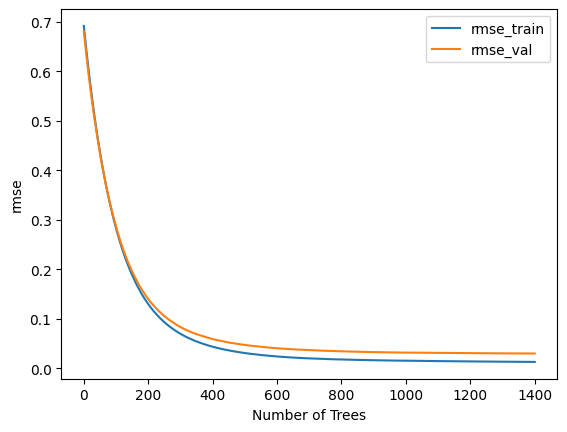

In [13]:
learning_curve = modelXGB.evals_result()
fig, ax = plt.subplots()
ax.plot(learning_curve['validation_0']['rmse'])
ax.plot(learning_curve['validation_1']['rmse'])
plt.legend(['rmse_train', 'rmse_val'])
ax.set_xlabel('Number of Trees')
ax.set_ylabel('rmse')
ax.tick_params(axis = 'both')
plt.show()

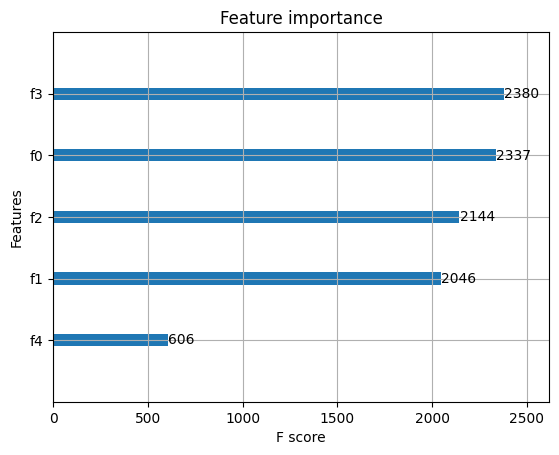

{'f0': 2337, 'f2': 2144, 'f1': 2046, 'f3': 2380, 'f4': 606}
as expected, the fifth feature f4 is the least important (it's a random feature)


In [14]:
xgb.plot_importance(modelXGB)
plt.show()

print(modelXGB.get_booster().get_score())
print("as expected, the fifth feature f4 is the least important (it's a random feature)")